(300, 200)


TypeError: object of type 'int' has no len()

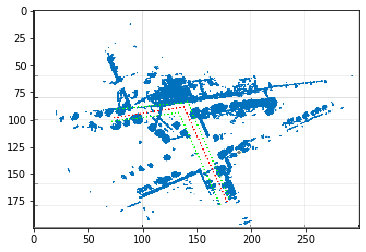

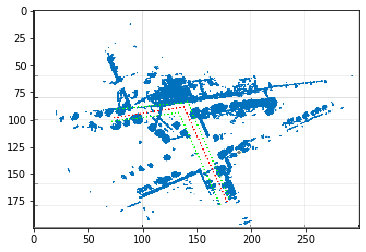

In [13]:
# importing matplotlib modules 
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import numpy as np
from PIL import Image

image = Image.open('Map.png')  
image.show()
# # Read Images  
new_image = image.resize((300, 200))
new_image.save('Map_resize.png')
plt.imshow(new_image)
print(new_image.size)
fig,ax = plt.subplots()
ax.imshow(new_image)

# Rewrite x,y ticks
ax.set_xticks(300)
ax.set_yticks(200)
ax.set_xticklabels(ticklx.astype('int'))
ax.set_yticklabels(tickly.astype('int'))

In [5]:
    def plotting_func():
    # Plot the trajectory with the car visualized simultaneously
        # Params of car
    lf = 1.738
    lr = 1.738
    width = 2
    # Assume the length of the wheel is 0.5
    lw = 0.5
    #figure
    # front
    x_f = z0(1)+lf*cos(z0(4));
    y_f = z0(2)+lf*sin(z0(4));
    % front left
    x_f_l = x_f-width/2*sin(z0(4));
    y_f_l = y_f+width/2*cos(z0(4));
    % front right
    x_f_r = x_f+width/2*sin(z0(4));
    y_f_r = y_f-width/2*cos(z0(4));
    % rear
    x_r = z0(1)-lr*cos(z0(4));
    y_r = z0(2)-lr*sin(z0(4));
    % rear left
    x_r_l = x_r-width/2*sin(z0(4));
    y_r_l = y_r+width/2*cos(z0(4));
    % rear right
    x_r_r = x_r+width/2*sin(z0(4));
    y_r_r = y_r-width/2*cos(z0(4));
    % draw the car
%     plot (x_f_l,y_f_l,"*")
%     plot (x_f_r,y_f_r,"*")
%     plot (x_r_l,y_r_l,"*")
%     plot (x_r_r,y_r_r,"*")
    hold all
    h1=line([x_f_l,x_f_r],[y_f_l,y_f_r],'Color','blue')
    h2=line([x_f_l,x_r_l],[y_f_l,y_r_l],'Color','blue')
    h3=line([x_r_l,x_r_r],[y_r_l,y_r_r],'Color','blue')
    h4=line([x_f_r,x_r_r],[y_f_r,y_r_r],'Color','blue')
    pause(1);
    % calculate the wheel
    % left wheel
    w_f_l_x = x_f_l+lw/2*cos(z0(4)-u(2,1));
    w_r_l_x = x_f_l-lw/2*cos(z0(4)-u(2,1));
    w_f_l_y = y_f_l+lw/2*sin(z0(4)-u(2,1));
    w_r_l_y = y_f_l-lw/2*sin(z0(4)-u(2,1));
    % right wheel
    w_f_r_x = x_f_r+lw/2*cos(z0(4)-u(2,1));
    w_r_r_x = x_f_r-lw/2*cos(z0(4)-u(2,1));
    w_f_r_y = y_f_r+lw/2*sin(z0(4)-u(2,1));
    w_r_r_y = y_f_r-lw/2*sin(z0(4)-u(2,1));
%     w_f_x = x_f+lw/2*cos(z0(4)-u(2,1));
%     w_f_y = y_f+lw/2*sin(z0(4)-u(2,1));
%     w_r_x = x_f-lw/2*cos(z0(4)-u(2,1));
%     w_r_y = y_f-lw/2*sin(z0(4)-u(2,1));
    % Draw the wheel
    h5=line ([w_f_l_x,w_r_l_x],[w_f_l_y,w_r_l_y],'Color','red')  
    h6=line ([w_f_r_x,w_r_r_x],[w_f_r_y,w_r_r_y],'Color','red') 
    h=[h1,h2,h3,h4,h5,h6]; 
    z_list = [z_list z];
    u_list = [u_list u];
    z0 = z;
    i = i + 1;
    pause(1)
    hold on
    plot(z_list(1,:), z_list(2,:), 'm', 'linewidth', 2)
    delete(h)

Original Dimensions :  (1036, 1314, 4)


NameError: name 'cv2' is not defined